<a href="https://colab.research.google.com/github/ian24365/DALC_Scala/blob/main/07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝 - 회귀분석

In [ ]:
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

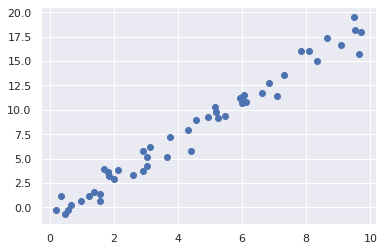

In [ ]:
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x-1 + rng.randn(50)
plt.scatter(x,y);

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)

In [ ]:
X = x.reshape(50,1)
X.shape

(50, 1)

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 모델확인
print(model.coef_) # 기울기
print(model.intercept_) # 절편

[1.9776566]
-0.9033107255311146


In [ ]:
# 모델의 정확도 확인
model.score(X, y)

0.9749140085676858

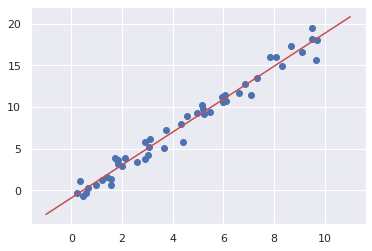

In [ ]:
# 모델 시각화
xfit = np.linspace(-1, 11)
plt.scatter(x, y)
plt.plot(xfit, model.coef_ *xfit + model.intercept_, '-r');

In [ ]:
# 초모수를 통해 모델의 성과 개선 방법

In [ ]:
#파이프라인 전처리 프로그램과 선형 회귀 모델을 묶어주는 프로그램

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
#데이터 생성

In [ ]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N)**2
    y = 10-1. / (X+0.1)
    if err > 0:
        y += err*rng.randn(N)
        return X,y
    
X, y = make_data(40)

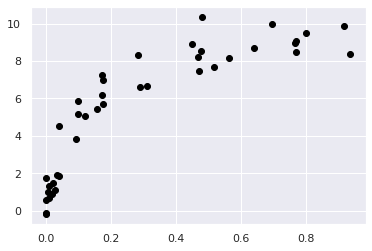

In [ ]:
# 데이터 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)
plt.scatter(X,y,color='black'). axis=plt.axis()

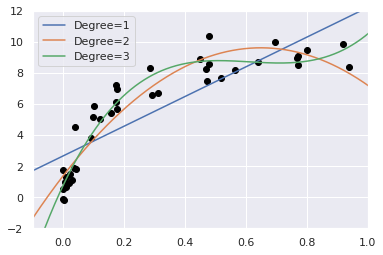

In [ ]:
#데이터 적합 결과 시각화

plt.scatter(X, y, color='black')

for degree in [1,2,3]:
    model = PolynomialRegression(degree)
    model.fit(X[:,np.newaxis], y)
    y_test = model.predict(X_test[:, np.newaxis])
    plt.plot(X_test, y_test, label=f'Degree={degree}')

plt.axis([-0.1, 1.0, -2, 12])
plt.legend(loc='best');

In [ ]:
# 과소적합과 과적합 사이에 적절한 트레이드 오프를 제공하는 것은 몇 차 다항식인지 찾는 것

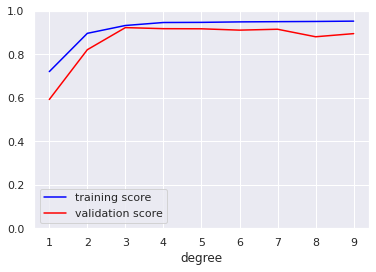

In [ ]:
# 데이터 검증 곡선 
from sklearn.model_selection import validation_curve
degree = np.arange(1,10)

train_score, val_score = validation_curve(PolynomialRegression(),
     X[:, np.newaxis], y, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1),color = 'blue', label='training score')
plt.plot(degree, np.median(val_score,1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree');